# Week 7 Exercise: Calculate the Hubble expansion rate with least-squares fitting

In [1]:
# NO NEED to run the two lines below. They enable equation referencing across markdown cells in Jupyter

In [2]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

In [3]:
%%javascript
MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);

<IPython.core.display.Javascript object>

# Introduction: Hubble's Law, measuring the expansion rate of the Universe

### In this exercise we will repeat the measurement of the expansion rate of the Universe originally performed by Edwin Hubble in 1929.

Hubble measured both redshifts $z$ and distances $D$ for 20 galaxies.

The redshift of a galaxy is defined as:
\begin{equation}
    z \equiv \frac{\lambda_{\text{observed}}- \lambda_{\text{emitted}}}{\lambda_{\text{emitted}}} ,
\end{equation}
where $\lambda_{\text{observed}}$ is the wavelength of light we observe for a given feature in the galaxy's spectrum (i.e. absorption line), and $\lambda_{\text{emitted}}$ is the wavelength at which that feature was emitted (we can usually identify absorption lines of well-known energy transitions in a galaxy's spectrum).

The redshift of the light we observe from a galaxy can be due to the velocity of that galaxy relative to us, via the Doppler effect.

As we will see in this exercise, the observed light of a galaxy can also redshift due to the expansion of the Universe, in a way that is proportional to the distance that galaxy is away from us, as Hubble discovered in his groundbreaking discovery.

At the time when Hubble made his study of whether a galaxy's redshit depends on its distance from us, it was commonly believed that the Universe was static and unchanging. Hubble had in mind to investigate the motion of galaxies relative to Earth to understand the structure and dynamics of the universe. He made the following plot of redshift versus distance (from Hubble 1929, Proc. Nat. Acad. Sci., 15, 168):

<div>
<img src="Hubble_dat.png" width="500"/>
</div>

The vertical axis of Hubble's plot of galaxy redshift vs. distance above is actually given in terms of velocity. That's because Hubble interpreted redshifts as Doppler shifts, so he used the classical, nonrelativistic relation for the Doppler shift, $z=v/c$, where $v$ is the radial velocity of the light source (galaxy). Interpreting the redshifts as Doppler shifts this way, Hubble's famous law takes the form:

\begin{equation}
    v = H_{0} D ,
\end{equation}

where $H_{0}$ is the constant of proportionality between galaxy "redshift" $v$ and distance $D$. $H_{0}$ is derived by finding the slope of that line which is plotted over the data in Hubble's plot above. In this exercise we will see exactly how to find the slope of that line and calculate $H_{0}$.

Hubble's discovery at the time was shocking. It implied that all the galaxies in Hubble's data set are moving away from us, at velocities proportional to their distances (with $H_{0}$ the constant of proportionality), the farthest galaxies moving away from us the fastest. Thus the expansion of the Universe was discovered.

It is a subtle distinction, but in fact the more correct form of Hubble's law is in terms of redshift:

\begin{equation}
    z = \frac{H_{0}}{c} D .
\end{equation}

That's because the redshift in Hubble's law does not describe the literal velocity through space of a galaxy relative to us. Rather, the cosmological redshift of the light of distant galaxies measured by Hubble is primarily due to the expansion of space itself, a consequence of the overall spacetime expansion of the Universe.


Today we will directly measure the rate of that expansion, $H_{0}$, using the data fitting methods we discussed in our previous classes.

### We will measure the expansion rate of the Universe using Type Ia Supernovae data from the Supernova Cosmology Project (SCP)
One of the key findings of the SCP is strong evidence for the existence of dark energy, which drives the expansion of the Universe to accelerate. The SCP team obtained this result by measuring the distances and redshifts of Type Ia Supernovae, climbing the cosmological distance ladder out to very far scales. Since, as we just described, the Supernova's redshift is a direct measure of how much the space through which its light has travelled has been stretched by the Universe's expansion, this measurement allowed the SCP team to determine the expansion rate of the Universe at various epochs. They found the Universe's expansion to be accelerating. 

We will use the SCP data to repeat the original analysis of Hubble, to calculate the expansion rate of the Universe at the present day.

Also, you might ask, why did the SCP team focus on observations of Type Ia Supernovae in order to study the expansion of the Universe out to large distances? The answer is because: not only are Type Ia Supernovae among the most luminous objects in the Universe, they are also robust distance indicators, called "Standard Candles". This is because, due to their specific explosion mechanism, Type Ia Supernovae have a consistent peak luminosity. Therefore, by measuring the luminosity magnitudes of these Supernovae we can infer the distance to the Supernova, out to very large distances.

# Outline of this Exercise
### Before getting into it, a quick outline of what is to come:

## In Section 1: 
      We read in data for the redshift vs. distance modulus of Type Ia SNe from the SCP catalog using the Pandas module. We will convert the data into a suitable form for our analysis, using basic error propagation. We will also visualize the data, identify a subset of the data at low redshifts appropriate for our analysis, and discuss the general principle of our analysis.
      
## In Section 2:
      We derive the relevant equations for an unweighted linear least-squares fit, introducing several immportant concepts such as the Chi-squared parameter. Then we apply an unweighted linear least-squares fit to the SCP SNe data (with simplified uncertainties to accomodate the assumptions of an unweighted fit) in order to calculate the Hubble constant $H_{0}$, and we calculate the uncertainty of our measurement.
      
## In Section 3:
      We present the relevant equations for a weighted linear least-squares fit, and write a code to perform the weighted least-squares fit to the SCP SNe data, for a more accurate treatment of the uncertainties in the SNe data. From our fit we more accurately calculate the Hubble constant $H_{0}$, along with the uncertainty of our measurement.
      
## In Section 4: 
      We calculate the Hubble constant $H_{0}$, along with its uncertainty, by fitting a linear distribution to the SCP SNe data using scipy.optimize.curve_fit, and compare our result with the current measurement of $H_{0}$ from Planck.
       
## In Section 5: 
        We present the Chi-squared test for a fit distribution, and apply it to our linear fit to the SNe data to quantify how well the linear distribution we calculate describes the data. We also compare the distribution of residuals of data from our linear fit with a normal distribution, visualizing the accuracy of our fit to the data.
        
### Now let's start!      

# Section 1: Read, visualize and process the data

Import the external libraries we will use

In [4]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

First we will **read in the data**. As we saw before, there are multiple ways to do this. This time we will read in the data using **pandas**. Notice that the first five lines of the data file are header information, so we skip those lines while reading in the data using the **"skiprows"** command. Then we convert the data into **numpy arrays** to use in our analysis.

In [5]:
#Supernova data is in the format: name, redshift, distance modulus, distance modulus uncertainty
#Read it using Pandas module
df=pd.read_csv('SCPUnion2.1_mu_vs_z.txt', skiprows=[0,1,2,3,4], sep='\t',names=['name','Redshift','DistanceMod','DistanceModErrp','DistanceModErrm'])
print(df)

#see how pandas interpreted data types to make sure its correct; we want the data to be float64
print(df.dtypes)
#make arrays out of the data using NumPy
Redshift=np.array(df.Redshift)
DistanceMod=np.array(df.DistanceMod)
DistanceModErrp=np.array(df.DistanceModErrp)
DistanceModErrm=np.array(df.DistanceModErrm)

#combine plus/minus uncertainties in Distance Modulus into a single array of plus/minus errors using np.stack
#Also notice that we transpose the array in order to match the shape of Redshift and DistanceMod arrays
DistanceModErr=np.stack((DistanceModErrp,DistanceModErrm),axis=1).T

       name  Redshift  DistanceMod  DistanceModErrp  DistanceModErrm
0    1993ah  0.028488    35.346583         0.223906         0.128419
1    1993ag  0.050043    36.682368         0.166829         0.128419
2     1993o  0.052926    36.817691         0.155756         0.128419
3     1993b  0.070086    37.446737         0.158467         0.128419
4    1992bs  0.062668    37.483409         0.156099         0.128419
..      ...       ...          ...              ...              ...
575   D-000  1.017000    44.293971         0.171046         0.000015
576   D-006  1.315000    44.971358         0.187509         0.551672
577   P-009  0.821000    43.640939         0.194014         0.551672
578   R-012  1.215000    45.246521         0.560317         0.000148
579   Z-005  0.623000    42.514524         0.241428         0.551672

[580 rows x 5 columns]
name                object
Redshift           float64
DistanceMod        float64
DistanceModErrp    float64
DistanceModErrm    float64
dtype: object

The data Distance vs. Redshift data from Supernova cosmology project gives distance in terms of **Distance Modulus** $\mu$, a quantity used by cosmologists to describe distances on a logarithmic scale. The distance modulus is the difference between the apparent and absolute magnitudes, $m$ and $M$, respectively, of an astronomical object:

\begin{equation}
    \mu = m - M
\end{equation}

However, it is more convenient for our purposes to describe distances in units of physical length (e.g. meters, parsec, etc.). The Distance Modulus is related to the **Luminosity Distance** $D_{L}$ (measured in parsec) by the relation:

\begin{equation}
    \log_{10} D_{L} = 1 + \frac{\mu}{5}
\end{equation}

So let us convert our data from Distance Modulus to Luminosity Distance (in parsec) by **defining the following function**:

In [6]:
#Let's convert from distance modulus to distance using the formula above
def DistConv(x):
    #x: an integer, float, or array that represents Distance Modulus
    #returns: Luminosity Distance (parsec)
    powr=x/5+1
    return 10**powr

which we apply to the data array of measurements of Distance Modulus:

In [7]:
Distance=DistConv(DistanceMod)

We must also convert the uncertainties in Distance Modulus given in the data above to uncertainties in Luminosity Distance. Recall from Taylor Section 3.7 that, provided the uncertainties in question are small (compared to the measured values they correspond to), then **the following relation holds between uncertaintes $\delta q$ and $\delta x$ for $q \left( x \right)$ a function of $x$**:

<div>
<img src="Uncertainty_1.png" width="500"/>
</div>

which we can use to **derive the uncertainties in Luminosity Distance from the corresponding uncertainties on Distance Modulus**:
\begin{equation}
\begin{aligned}
    \delta D_{L} & = \frac{d D_{L}}{d \mu} \delta \mu \\
        & = \frac{d}{d \mu} \left( 10^{\frac{\mu}{5}+1} \right) \delta \mu \\
        & = \frac{\log10}{5} 10^{\frac{\mu}{5}+1} \delta \mu ,
\end{aligned}
\end{equation}
which we implement on our data by defining the corresponding **function**:

In [8]:
#Let's convert uncertainties in distance modulus to distance according to the formula above
def DistErrConv(x,xerr):
    #x: Distance Modulus
    #xerr: Error in distance modulus
    #returns: error in luminosity distance
    powr=x/5+1
    const=math.log(10)/5.0
    return const*(10.0**powr)*xerr

In [9]:
DistanceErr=DistErrConv(DistanceMod,DistanceModErr)

Now let's visualize the data and uncertainties

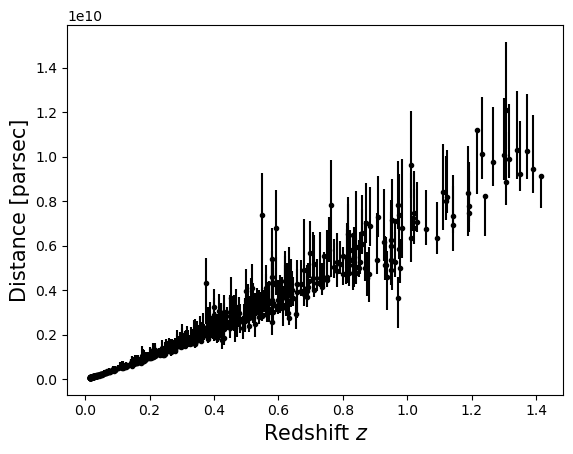

In [10]:
plt.xlabel('Redshift $z$', fontsize=15)
plt.ylabel('Distance [parsec]', fontsize=15)
plt.errorbar(Redshift,Distance,yerr=DistanceErr,marker='.',linestyle='None',color='black')
plt.show()

The data in the plot above tell us about the expansion rate of the Universe. Now we will derive this expansion rate of the Universe by reproducing a simplified version of the groundbreaking discovery of the Universe's expansion by Edwin Hubble in 1929. As discussed in the Introduction, Hubble measured the redshifts $z$ and distances $D$ for 20 galaxies in the local Universe, and found the linear relation now known as Hubble's law:
\begin{equation}
    z = \frac{H_{0}}{c} D_{H} .
\label{eq:HubbleLaw}
\end{equation}
Note that the distance which appears in Hubble's law, $D_{H}$, is different from the luminosity distance, $D_{L}$ which appears in our data. $D_{L}$ is the distance we measure by the amount of light detected from an object, and it takes into account the redshift of light due to the expansion of the Universe. However, Hubble's observations were measured in the local Universe, for very small values of redshift $z < 0.04$. For small values of $z \ll 1$, $D_{H} \simeq D_{L}$, and therefore we can use our data to approximately calculate the expansion rate of the Universe through Hubble's law, in the same way Hubble did in his original analysis.

First, let's find the subset of data that only includes Supernovae in the local universe, $z < 0.1$, in order to more closely match Hubble's analysis:

In [11]:
#We will find the subset of data for which $z<0.1$ 

#define a function which takes in data arrays and returns the subset of each array corresponding to z<0.1
#using For and If 
def LocalZs(MaxZ,Redshifts,Distances,DistanceErrs):
    #MaxZ: the maximum redshift z you will consider in your data subset
    #Redshifts: Redshift data array
    #Distances: Distance data array
    #DistanceErrs: Uncertainties in Distance data array
    zLoc=float(MaxZ)
    RedshiftLocs=[]
    DistanceLocs=[]
    DistanceErrLocs=[]
    for i in range(len(Redshifts)):
        if Redshift[i]<zLoc:
            RedshiftLocs.append(Redshifts[i])
            DistanceLocs.append(Distances[i])
            DistanceErrLocs.append(DistanceErrs.T[i])
    return np.array(RedshiftLocs), np.array(DistanceLocs), np.array(DistanceErrLocs).T

#define the arrays of local (z<0.1) data by calling the above function
RedshiftLoc,DistanceLoc,DistanceErrLoc=LocalZs(0.1,Redshift,Distance,DistanceErr)

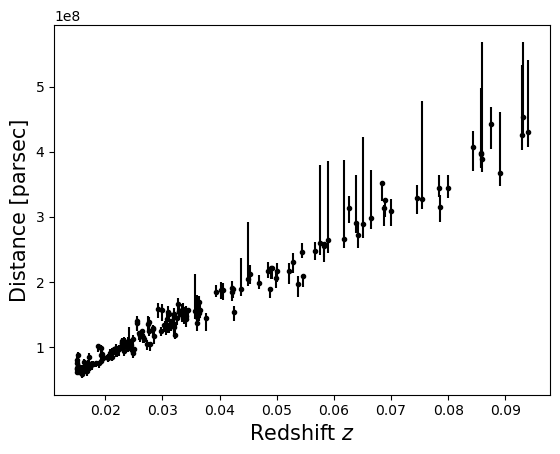

In [12]:
#Now plot the local data
plt.xlabel('Redshift $z$', fontsize=15)
plt.ylabel('Distance [parsec]', fontsize=15)
plt.errorbar(RedshiftLoc,DistanceLoc,yerr=DistanceErrLoc,marker='.',linestyle='None',color='black')
plt.show()

We have isolated the data for $z<0.01$, as shown in the plot above.

Now that we have a data set similar to Hubble's, let's repeat his analysis, using **least-squares fitting**. As we've seen, there are several packages in Python which we can use to do this, but for educational purposes let's get some more practice **writing our own least-squares regression code**.

# Section 2: Unweighted linear least-squares fit for the Hubble constant

**To start**, let's do the simplest thing and **assume uncertainties in $D_{L}$ are Gaussian and have the same magnitude for each measurement**, this is called an **unweighted** fit. This is clearly not true - the uncertainties in our data naturally become larger for greater distances, but we'll start with this simplified case to remind ourselves some of the basic theory of least-squres fitting, and later we will calculate a more accurate fit and compare the two results.

Now let's recall some basic theory (also read Taylor Section 8.1-8.4):

We have a series of measurements ${x_{i},y_{i}}$ (in our case ${z_{i},D_{L,i}}$), where $i$ runs from 1 to $N$, where $N$ is the number of measurements. We assume the relation between $y_{i}$ and $x_{i}$ follows a specific distribution, in this case we assume a linear distribution of the form:
\begin{equation}
    y_{i} = A + B x_{i}
\label{eq:Lin}
\end{equation}
for all ${x_{i},y_{i}}$ in the data.

We also simplistically assume that the uncertainties in $y_{i}$, $\delta y_{i}$ are equal for all measurements $i$ and are Gaussian distributed, $\delta y_{i} = \sigma_{y_{i}} = \sigma_{y}$. Again, this clearly does not match our data, but we will make this simplifying assumption (for now).

If it is true, as we assume, that a linear relation of the form above is the true distribution of the data, then the probability of obtaining each observed value of $y_{i}$ for each $x_{i}$ in our data is given by:
\begin{equation}
    Prob_{A,B} \left( y_{i} \right) \propto \frac{1}{\sigma_{y}} e^{-\left( y_{i} - A - B x_{i} \right)^{2}/2 \sigma_{y}^{2}} ,
\end{equation}
and the probability of obtaining the complete set of measurements in our data, ${{x_{i},y_{i}},...,{x_{N},y_{N}}}$ is given by the product of probabilities of each individual measurement:
\begin{equation}
\begin{aligned}
    Prob_{A,B} \left( y_{1},...,y_{N} \right) & = Prob_{A,B} \left( y_{i} \right)...Prob_{A,B} \left( y_{N} \right) \\
    & \propto \frac{1}{\sigma_{y}^{N}} e^{-\chi^{2}/2}
\end{aligned}
\end{equation}
where the familiar Chi-squared parameter $\chi^{2}$ is given by:
\begin{equation}
    \chi^{2} = \sum_{i=1}^{N} \frac{\left(y_{i} - A - B x_{i} \right)^{2}}{\sigma_{y}^{2}}
\end{equation}

Now, in order to **derive the unknown fit parameters $A$ and $B$** which describe this linear distribution of our data, we can use the **principle of maximum likelihood**, which says that the best estimates for the unknown parameters $A$ and $B$ are those which **minimize $\chi^{2}$**. Then, in order to fit for $A$ and $B$ we need to minimize $\chi^{2}$ with respect to $A$ and $B$ simultaneously:

\begin{equation}
    \frac{\partial \chi^{2}}{\partial A} = - \frac{2}{\sigma_{y}^{2}} \sum_{i=1}^{N} \left( y_{i} - A - B x_{i} \right) = 0
\end{equation}

\begin{equation}
    \frac{\partial \chi^{2}}{\partial B} = - \frac{2}{\sigma_{y}^{2}} \sum_{i=1}^{N} x_{i} \left( y_{i} - A - B x_{i} \right) = 0  .
\end{equation}


Simultaneously solving the two equations above for $A$ and $B$ yields:

\begin{equation}
    A = \frac{\sum_{i=1}^{N} x_{i}^{2} \sum_{i=1}^{N} y_{i} - \sum_{i=1}^{N}x_{i} \sum_{i=1}^{N}x_{i} y_{i} }{\Delta}
\label{eq:Afit}
\end{equation}

\begin{equation}
    B = \frac{N \sum_{i=1}^{N} x_{i} y_{i} - \sum_{i=1}^{N} x_{i} \sum_{i=1}^{N} y_{i} }{ \Delta}
\label{eq:Bfit}
\end{equation}

where $\Delta$ is defined as:
\begin{equation}
    \Delta \equiv N \sum_{i=1}^{N} x_{i}^{2} - \left( \sum_{i=1}^{N} x_{i} \right)^{2}
\end{equation}

These Equations \eqref{eq:Afit} and \eqref{eq:Bfit} for $A$ and $B$ above give the **best estimate** of the linear relation which **we assume** describes our data, according to the **principle of maximum likelihood**. Later we will check this assumption.


Notice: that **under this simplifying assumption of Gaussian errors that are equal for each measurement** (a drastic simplification of the real data in our case), **the fit parameters $A$ and $B$ do not depend on the error $\sigma_{y}$**.


Now let's start writing our least-squares fitting code with the relations above...

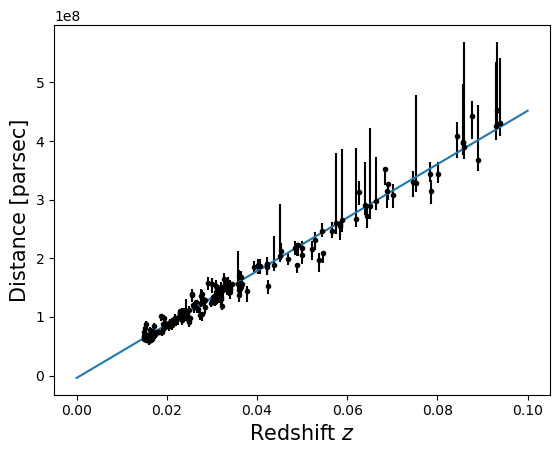

In [13]:
#Let's write the functions which will execute our least-squares fit to the local Distance vs Redshift data
# assuming a linear distribution, a valid assumption in the local z<0.1 Universe
#Assuming equal Gaussian uncertainties for each Distance measurement
#implementing the equations derived above

def regressionUnweighted(xdat,ydat):
    #fit the line ydat = A+B*xdat to the data
    #xdat: xdata array
    #ydat: ydata array
    #returns: A,B of a unweighted fit of the distribution y=A+B*x to the data
    Delta = float(len(xdat))*np.sum(xdat*xdat)-(np.sum(xdat))**2.0
    A = (np.sum(xdat*xdat)*np.sum(ydat)-np.sum(xdat)*np.sum(xdat*ydat))/Delta
    B = (float(len(xdat))*np.sum(xdat*ydat)-np.sum(xdat)*np.sum(ydat))/Delta
    return A,B

#Using the function above, fit a line to the local data:
Afit,Bfit=regressionUnweighted(RedshiftLoc,DistanceLoc)

#Now plot the result, along with the data for comparison:
plt.xlabel('Redshift $z$', fontsize=15)
plt.ylabel('Distance [parsec]', fontsize=15)
plt.errorbar(RedshiftLoc,DistanceLoc,yerr=DistanceErrLoc,marker='.',linestyle='None',color='black')
#define the plot variable xarr:
xarr=np.linspace(0.0,0.1,100)
plt.plot(xarr,Afit+Bfit*xarr)
plt.show()

The result of our linear fit to the $D_{L}$vs$z$ data is plotted with a blue line over the data above. By eye it looks like a good description of the data - later we will quantify how good the linear distribution we derive describes our data.

Having derived the fit parameters $A$ and $B$ of the distribution:
\begin{equation}
    D_{L,i} = A + B z_{i}
\end{equation}
we can calculate the Hubble constant:

Assume $A$ is consistent with zero (we will justify this in a moment), the relation we calculate through our least-squares fit is:
\begin{equation}
    D_{L,i} \simeq  B z_{i} .
\label{eq:HubbleFit}
\end{equation}

We also know, as discussed above, that in the local Universe (z << 1) the Hubble constant can be defined as in Equation \eqref{eq:HubbleLaw}, which is given by:
\begin{equation}
    z = \frac{H_{0}}{c} D_{H} \simeq \frac{H_{0}}{c} D_{L} .
\label{eq:HubbleEq}
\end{equation}

Therefore, comparing Equations \eqref{eq:HubbleFit} and \eqref{eq:HubbleEq}, our fit parameter $B$ is related to the Hubble constant by:
\begin{equation}
\begin{aligned}
    H_{0} & = \frac{c}{B} \\
        & = \frac{3 \times 10^{5} }{B \times 10^{-6}} \left[ \text{km}/\text{s}/\text{Mpc} \right] ,
\end{aligned}
\end{equation}
where in the final line we put the result in the conventional units of $H_{0}$, km/s/Mpc (note that $B$ is calculated in units of parsec)


We obtain the following results for $H_{0}$:

In [14]:
HubbleConst=3.0*10.0**5.0/(Bfit*10.0**-6.0)
print(HubbleConst)

65.8738181955385


**We calculate** $H_{0} \simeq 66$ km/s/Mpc. **Comparing with the current result from Planck satellite**: $H_{0} \simeq 67.4\pm0.5$km/s/Mpc, that's not too bad for such a simplified analysis!


**No analysis is complete without calculating the uncertainty in our measurement, though!**

We can calculate the uncertainty in our least-squares fit for $H_{0}$ under the simplifying assumptions we made of uniform, equal errors for each measurement. Again, this is an unrealistic assumption for this data! But don't worry, we will do a more precise calculation soon. For now let's continue using this assumption to get analytic intuition for our results.


Recall the general formula for error propagation, from Taylor Sect. 3.11:

<div>
<img src="Uncertainty_2.png" width="500"/>
</div>

We can derive the uncertainties in our fit parameters $\sigma_{A}$ and $\sigma_{B}$ using the formula for error propagation above:

\begin{equation}
    \sigma_{A} = \sqrt{ \sum_{i=1}^{N} \left( \frac{\partial A}{\partial y_{i}} \sigma_{y} \right)^{2}}
\label{eq:ErrGA}
\end{equation}

\begin{equation}
    \sigma_{B} = \sqrt{ \sum_{i=1}^{N} \left( \frac{\partial B}{\partial y_{i}} \sigma_{y} \right)^{2}}
\label{eq:ErrGB}
\end{equation}

Taking the partial derivatives $\partial A/\partial y_{i}$ and $\partial B/\partial y_{i}$ of Equations \eqref{eq:Afit} and \eqref{eq:Bfit} above gives the result:

\begin{equation}
    \sigma_{A} = \sigma_{y} \sqrt{\frac{\sum_{i=1}^{N} x_{i}^{2} }{ \Delta }}
\label{eq:ErrA}
\end{equation}

\begin{equation}
    \sigma_{B} = \sigma_{y} \sqrt{ \frac{N}{\Delta} }
\label{eq:ErrB}
\end{equation}

So now let's add a calculation of the uncertainty in our fit parameters to our linear regression code:

In [15]:
#Calculate the uncertainties in our least-squares fit to the local Distance vs Redshift data
# assuming a linear distribution, a valid assumption in the local z<0.1 Universe
#Assuming equal Gaussian uncertainties for each Distance measurement
#Implementing the equations derived above


def regressionErrorsUnweighted(xdat,Sigmay):
    #fit the line ydat = A+B*xdat to the data
    Delta = float(len(xdat))*np.sum(xdat*xdat)-(np.sum(xdat))**2.0
    SigmaA = Sigmay*np.sqrt(np.sum(xdat*xdat)/Delta)
    SigmaB = Sigmay*np.sqrt(float(len(xdat))/Delta)
    return SigmaA,SigmaB

#We need to arbitrarily choose something for the uncertainty in D_{L} if we are assuming it to be
#equal for all measurements. Let's arbirily take the mean over all plus/minus errors:
SigmaDist=np.mean(DistanceErrLoc.flatten())

#Using the function above, calculate uncertainty in fit parameters
AfitErr,BfitErr=regressionErrorsUnweighted(RedshiftLoc,SigmaDist)

#print the value of the Hubble constant +/- uncertainty

#Calculate the uncertainty in the Hubble constant from the uncertainty in the fit parameter B using
#error propagation
HubbleConstErr=BfitErr*3.0*10.0**5.0/(Bfit**2.0*10.0**-6.0)

#print the value of the Hubble constant +/- uncertainty
print(HubbleConst,'\pm',HubbleConstErr)


65.8738181955385 \pm 0.7576366897458197


We calculate $H_{0} \simeq 65.8 \pm 0.8$ km/s/Mpc. Again, comparing with the current result from Planck satellite, $H_{0} \simeq 67.4\pm0.5$km/s/Mpc, our simplistic fit is pretty good!

However, our simplistic treatment of errors as being equal for each measurement is not a true representation of the uncertainties in our data. **So now let's do something more accurate**. Although **we will continue assuming Gaussian uncertainties for our data**, let's **treat the uncertainty of each individual measurement** in a **weighted least-squares fit**...

# Section 3: **Weighted** linear least-squares fit for the Hubble constant

Now let's calculate the Hubble constant in the local Universe by calculating a linear fit to our Redshift $z$ vs. Distance $D_{L}$ data with a **weighted least-squares fit**. That is, now let's **consider the uncertainty in each $D_{L,i}$ measurement $\sigma_{D_{L,i}}$**. We will **continue to assume that $\sigma_{D_{L,i}}$ is Gaussian distributed** - in a future exercise we will explore ways to abandon this simplifying assumption as well, and consider the asymmetric uncertainties of our data (e.g. "plus" uncertainties different from "minus" uncertainties), but for now we consider this simpler case of **Gaussian uncertainties in a weighted fit**.

We can repeat the derivations above for the fit parameters $A$ and $B$, as well as their uncertainties, of a **linear least-squares fit** to the data of the form $y_{i} = A + B x_{i}$, generalizing to the case where **each measurement has a different uncertainty** $\sigma_{y_{i}}$. The derivation is very similar to the discussion of the section above and I encourage you to derive it. For now we will simply the state the results from **Taylor Problems 8.9 and 8.19:**

Define the **weight** of each measurement, $w_{i}$, as $w_{i} = 1/\sigma_{i}^{2}$. Then, according to the principle of maximum likelihood, the best estimates for $A$ and $B$ are:

\begin{equation}
    A = \frac{ \sum_{i=1}^{N} w_{i} x_{i}^{2} \sum_{i=1}^{N} w_{i} x_{i} - \sum_{i=1}^{N} w_{i} x_{i} \sum_{i=1}^{N} w_{i} x_{i} y_{i} }{ \Delta  }
\end{equation}
and
\begin{equation}
    B = \frac{ \sum_{i=1}^{N} w_{i} \sum_{i=1}^{N} w_{i} x_{i} y_{i} - \sum_{i=1}^{N} w_{i} x_{i} \sum_{i=1}^{N} w_{i} y_{i} }{ \Delta  }
\end{equation}
where in this weighted case $\Delta$ is defined as:
\begin{equation}
    \Delta = \sum_{i=1}^{N} w_{i} \sum_{i=1}^{N} w_{i} x_{i}^{2} - \left( \sum_{i=1}^{N} w_{i} x_{i} \right)^{2} .
\end{equation}

Their uncertainties $\sigma_{A}$ and $\sigma_{B}$ calculated from the weighted least-squares fit are:

\begin{equation}
    \sigma_{A} = \sqrt{ \frac{ \sum_{i=1}^{N} w_{i} x_{i}^{2} }{ \Delta } }
\end{equation}
and
\begin{equation}
    \sigma_{B} = \sqrt{ \frac{ \sum_{i=1}^{N} w_{i} }{ \Delta } }
\end{equation}

Now using the relations above we can improve our linear least-square fit code to individually handle each uncertainty $\sigma_{D_{L,i}}$:

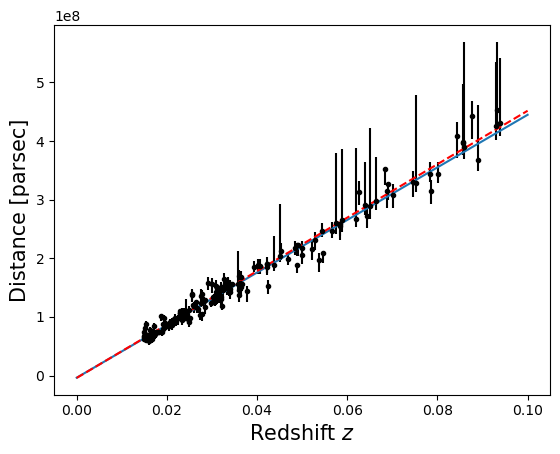

In [16]:
#Weighted least-squares fit to the local Distance vs Redshift data
# assuming a linear distribution, a valid assumption in the local z<0.1 Universe
#Assuming Gaussian-distributed uncertainties for each individual Distance measurement

#calculate linear fit parameters and uncertainties
def regressionWeighted(xdat,ydat,yerr):
    #weighted fit to the line ydat = A+B*xdat to the data
    #xdat: array of x data
    #ydat: array of y data
    #yerr: array of uncertainties in y data
    #returns: A,B,SigmaA,SigmaB
    #of a weighted linear fit A+B*x to the data
    
    #construct the weights from yerr
    weights=1.0/(yerr*yerr)
    
    Delta = np.sum(weights)*np.sum(weights*xdat*xdat)-(np.sum(weights*xdat))**2.0
    #calculate fit parameters A, B
    A = ( np.sum(weights*xdat*xdat)*np.sum(weights*ydat)-np.sum(weights*xdat)*np.sum(weights*xdat*ydat) )/Delta
    B = ( np.sum(weights)*np.sum(weights*xdat*ydat)-np.sum(weights*xdat)*np.sum(weights*ydat) )/Delta
    #calculate uncertainties of fit parameters
    SigmaA = np.sqrt(np.sum(weights*xdat*xdat)/Delta)
    SigmaB = np.sqrt(np.sum(weights)/Delta)
    return A,B,SigmaA,SigmaB

#Using the weighted least-squares fitting function above, fit a line to the local data:
#Because of our simplifying assumption of Gaussian distributed errors, we have to simplify the data errors,
#which are asymmetric. Here we choose to take the average of plus and minus uncertainties of each
#individual measurement
SigmawDist=np.mean(DistanceErrLoc.T, axis=1)

#calculate the weighted least squares fit
Awfit,Bwfit,AwfitErr,BwfitErr = regressionWeighted(RedshiftLoc,DistanceLoc,SigmawDist)

#Now plot the result, along with the data for comparison:
plt.xlabel('Redshift $z$', fontsize=15)
plt.ylabel('Distance [parsec]', fontsize=15)
plt.errorbar(RedshiftLoc,DistanceLoc,yerr=DistanceErrLoc,marker='.',linestyle='None',color='black')
xarr=np.linspace(0.0,0.1,100)
plt.plot(xarr,Awfit+Bwfit*xarr)
#Also plot the unweighted fit with a red dashed line for comparison
plt.plot(xarr,Afit+Bfit*xarr,linestyle='--', color='red')
plt.show()

In the plot above of $D_{L}$ vs $z$ data, the result of our weighted least-squares fit is shown with a blue line, while the unweighted least-squares is shown with a red dashed line for comparison.

Now that we have fit the linear distribution to our data, let's again calculate $H_{0}$:

In [17]:
#Calculate the Hubble constant from the weighted fit parameter B in units of km/s/Mpc
HubbleConstw=3.0*10.0**5.0/(Bwfit*10.0**-6.0)
#Calculate the uncertainty in the Hubble constant from the uncertainty in the weighted fit parameter B using
#error propagation
HubbleConstwErr=BwfitErr*3.0*10.0**5.0/(Bwfit**2.0*10.0**-6.0)

#print the value of the Hubble constant +/- uncertainty
print(HubbleConstw,'\pm',HubbleConstwErr)

66.94076002391753 \pm 0.7737638184539288


From our weighted fit we calculate the Hubble constant and its uncertainty: $H_{0} \simeq 66.9 \pm 0.8$ km/s/Mpc, which is closer to the current result from Planck satellite of $H_{0} \simeq 67.4\pm0.5$km/s/Mpc than the unweighted fit we calculated in the last section, and happens to be within uncertainty of the Planck result!

# Section 4: Least-squares fit for the Hubble constant using SciPy

Now let's move on to using a package in Python to fit for the Hubble constant from our $D_{L}$vs.$z$ data. Specifically, let's use curve_fit from scipy.optimize. This will be useful because curve_fit is a powerful tool we can use to fit more general functions to data. You can read about scipy.optimize.curve_fit in the documentation here:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

In [18]:
from scipy.optimize import curve_fit

#define the functional form we want to fit, in this case a line:
def fline(x,a,b):
        return a+b*x
    
#calculate the weighted least squares fit
ParamFits,ParamCov = curve_fit(fline,RedshiftLoc,DistanceLoc,sigma=np.mean(DistanceErrLoc.T, axis=1))

#curve_fit returns the covariance matrix in ParamCov, whose diagonal elements are the squared errors
ParamErrs=np.sqrt(np.diag(ParamCov))

#print the calculated Hubble constant and its uncertainty

print("Hubble's constant:",3.0*10.0**5.0/(ParamFits[1]*10.0**-6.0),"=/-",ParamErrs[1]*3.0*10.0**5.0/(ParamFits[1]**2.0*10.0**-6.0))

Hubble's constant: 66.94076021552367 =/- 1.032869243944706


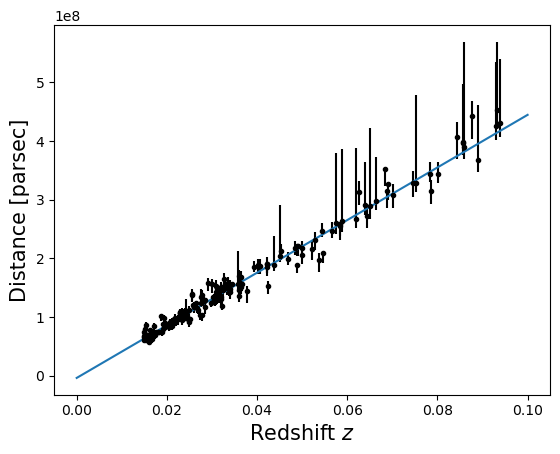

In [19]:
#Now plot the result, along with the data for comparison:
plt.xlabel('Redshift $z$', fontsize=15)
plt.ylabel('Distance [parsec]', fontsize=15)
plt.errorbar(RedshiftLoc,DistanceLoc,yerr=DistanceErrLoc,marker='.',linestyle='None',color='black')
xarr=np.linspace(0.0,0.1,100)
plt.plot(xarr,ParamFits[0]+ParamFits[1]*xarr)
plt.show()

With scipy.optimize.curve_fit we calculate: $H_{0} = 66.9 \pm 1$ km/s/Mpc

Much easier (and more powerful) than our homegrown solver!

# Section 5: Chi-squared test for the fit distribution

Looking at the plots of our fit distribution, it looks like a good fit. But we need a more quantitive way to measure how well our fit distribution describes the data. We can do this with the Chi-squared test.

Recall the definition of Chi-squared, $\chi^{2}$ (e.g. from Chapter 12 of Taylor): If we make $N$ measurements, for which we know the expected values (from the distribution we assume) and standard deviations (uncertainties), then we can define $\chi^{2}$ as:
\begin{equation}
        \chi^{2} = \sum_{i=1}^{N} \left( \frac{\text{Observed value} - \text{Expected value} }{ \text{Standard Deviation} }  \right)^{2}
\end{equation}

If the assumed distribution is a correct description of the data then $\chi^{2} \leq N - c$, where $c$ is the number of constraints on our data (the number of parameters we fit).

Let's apply the $\chi^{2}$ test to see how good our linear distribution fit is to the data for $D_{L}$vs.$z$:

In [20]:
#write a function to compute residuals of a linear fit
def ComputeResid(x,y,yerr,A,B):
    #x: an array of x data values
    #y: an array of y data values
    #yerr: an array of uncertainties in y
    #A: zero-point of expected linear distribution
    #B: slope of expected linear distribution
    residuals=np.array([])
    for i in range(len(x)):
        resid=y[i]-(A + B*x[i])
        residuals=np.append(residuals,resid/yerr[i])
    return residuals

In [21]:
#compute the residuals of the linear distribution we fit
Residuals=ComputeResid(RedshiftLoc,DistanceLoc,np.mean(DistanceErrLoc.T, axis=1),ParamFits[0],ParamFits[1])

#compute Chi-squared from residuals
Chi2=np.sum(Residuals*Residuals)
print("Chi-squared:",Chi2)

Chi-squared: 308.2620499719418


Let's now define the reduced $\chi^{2}$, $\tilde{\chi}^{2}$:
\begin{equation}
    \tilde{\chi}^{2}=\chi^{2}/d
\end{equation}
where $d$ is the number of degrees of freedom, defined as the number of data points minus the number of constraints (fit parameters), $d=N-c$. In the case of a linear distribution $c=2$:

In [22]:
print("Reduced Chi-squared:",Chi2/(len(Residuals)-2))

Reduced Chi-squared: 1.7818615605314554


We get a value of $\tilde{\chi}^{2}$ which is resonably close to 1, so our linear fit is a reasonably good description of the data.

Let's also take a look at the distribution of residuals:

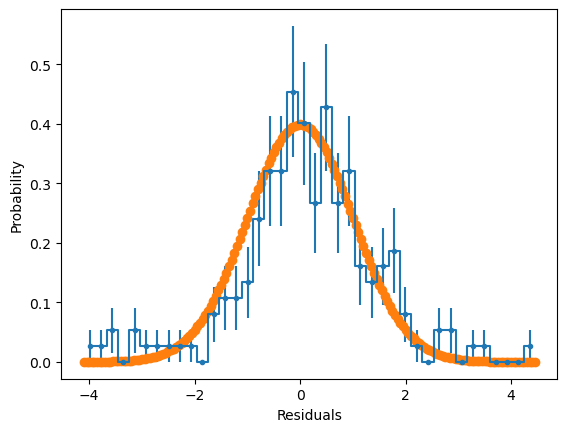

In [23]:
#Make a histogram of residuals of the data from our linear fit
ChiHist,Bin_Edges=np.histogram(Residuals,bins=40)
Bin_Centers=0.5*(Bin_Edges[1:]+Bin_Edges[:-1])
Norm=len(Residuals)*(Bin_Edges[-1]-Bin_Edges[0])/40.0
plt.errorbar(Bin_Centers,ChiHist/Norm,yerr=ChiHist**0.5/Norm,marker='.',drawstyle='steps-mid')

#Plot a Gaussian over the histogram
xv=np.arange(Bin_Edges[0],Bin_Edges[-1],0.05)
GaussDist=stats.norm.pdf(xv,0,1)
plt.plot(xv,GaussDist,'o-')
plt.xlabel('Residuals')
plt.ylabel('Probability')

plt.show()

We see that the mean of the residuals of our fit is very close to 0, and the variance is very close to 1 (the normalized histogram of residuals is very close to a normal distribution with mean of zero and variance of 1). The **linear distribution we fit is an acceptable description of the $D_{L}$ vs. $z$ data**. Our calculation of the Hubble constant $H_{0}$ is good!